Загрузим необходимые библиотеки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report

Загрузим и проверим данные

In [2]:
df = pd.read_csv('datasets/defect_category_data.csv')

df.info()
print(df.describe())
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   defect_category  6000 non-null   int64  
 1   var_1            6000 non-null   float64
 2   var_2            6000 non-null   int64  
 3   var_3            6000 non-null   float64
 4   var_4            6000 non-null   int64  
 5   var_5            6000 non-null   float64
 6   var_6            6000 non-null   int64  
 7   var_7            6000 non-null   float64
 8   var_8            6000 non-null   int64  
 9   var_9            6000 non-null   float64
 10  var_10           6000 non-null   int64  
 11  var_11           6000 non-null   float64
 12  var_12           6000 non-null   float64
dtypes: float64(7), int64(6)
memory usage: 609.5 KB
       defect_category        var_1        var_2        var_3        var_4  \
count      6000.000000  6000.000000  6000.000000  6000.000000  6000.00000

,defect_category,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12
0,1,6953.060560,0,3604.065994,0,0.403495,0,0.197050,1,0.819103,0,38.483621,1071.626315
1,1,7042.991473,0,3162.456833,0,0.543089,0,0.155076,1,0.795849,0,35.865654,1126.933978
2,1,5929.240308,0,3494.332481,0,-0.271669,0,0.226166,1,0.815661,0,39.483151,1017.375909
3,1,6492.669356,0,3914.969447,0,0.615971,0,0.134270,1,0.701073,0,37.846423,916.186422
4,0,6482.830756,0,3462.504037,0,0.243473,0,0.259252,1,0.771909,0,37.728373,1043.746807


Данные выглядят нормально. Пропусков не обнаружено. Проверим на наличие дубликатов.

In [3]:
df[df.duplicated() == True]

,defect_category,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12


Дубликатов не обнаружено

## Подготовка признаков

Приведем категориальные признаки к типу данных category

In [4]:
df.defect_category = df.defect_category.astype('category')
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   defect_category  6000 non-null   category
 1   var_1            6000 non-null   float64 
 2   var_2            6000 non-null   int64   
 3   var_3            6000 non-null   float64 
 4   var_4            6000 non-null   int64   
 5   var_5            6000 non-null   float64 
 6   var_6            6000 non-null   int64   
 7   var_7            6000 non-null   float64 
 8   var_8            6000 non-null   int64   
 9   var_9            6000 non-null   float64 
 10  var_10           6000 non-null   int64   
 11  var_11           6000 non-null   float64 
 12  var_12           6000 non-null   float64 
dtypes: category(1), float64(7), int64(5)
memory usage: 568.6 KB


Определим таргеты и фичи

In [5]:
features = df.drop(['defect_category'], axis=1)
target = df['defect_category']

Проверим баланс классов в defect_category

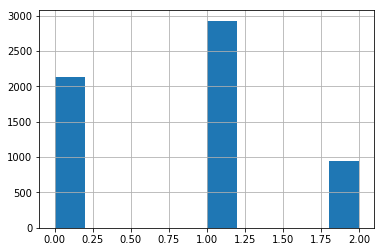

In [6]:
df.defect_category.hist()

Сильного дисбаланса не обнаружено

#### Разделим данные на тренировочные и тестовые в соотношении 7:3.

In [7]:
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.3, random_state=12345)


print(features_train.shape)
print(features_test.shape)

(4200, 12)
(1800, 12)


Проверим полученные колонки с признаками

In [8]:
features_train.columns

Index(['var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7', 'var_8',
       'var_9', 'var_10', 'var_11', 'var_12'],
      dtype='object')

Нормализуем признаки

In [9]:
sc = StandardScaler()

features_train = sc.fit_transform(features_train)
features_test = sc.fit_transform(features_test)

## Подготовка моделей

### Логистическая регрессия

In [10]:
model = LogisticRegression(multi_class='ovr')
model.fit(features_train, target_train)
predictions = model.predict(features_test)

print(classification_report(target_test, predictions))

              precision    recall  f1-score   support

           0       0.38      0.00      0.01       646
           1       0.49      1.00      0.65       874
           2       0.00      0.00      0.00       280

    accuracy                           0.49      1800
   macro avg       0.29      0.33      0.22      1800
weighted avg       0.37      0.49      0.32      1800



### Случайный лес

In [11]:
%%time
model = RandomForestClassifier()
model.fit(features_train, target_train)
predictions = model.predict(features_test)

print(classification_report(target_test, predictions))

              precision    recall  f1-score   support

           0       0.36      0.38      0.37       646
           1       0.49      0.59      0.53       874
           2       0.12      0.03      0.05       280

    accuracy                           0.43      1800
   macro avg       0.32      0.33      0.32      1800
weighted avg       0.38      0.43      0.40      1800

Wall time: 128 ms


### Градиентный бустинг

In [12]:
dtrain = xgb.DMatrix(data=features_train, label=target_train)
dtest = xgb.DMatrix(data=features_test)

In [13]:
params = {
    'max_depth': 10,
    'objective': 'multi:softmax',
    'num_class': 3
}

In [14]:
bst = xgb.train(params, dtrain)

predictions = bst.predict(dtest)

[19:40:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [15]:
print(classification_report(target_test, predictions))

              precision    recall  f1-score   support

           0       0.38      0.20      0.26       646
           1       0.50      0.81      0.61       874
           2       0.12      0.01      0.02       280

    accuracy                           0.47      1800
   macro avg       0.33      0.34      0.30      1800
weighted avg       0.40      0.47      0.40      1800



### Вывод:
Данные были проверены и нормализованны. Также они были разделены на обучающую и тестовую выборки.   
Были обучены три модели: логистическая регрессия, случайный лес и градиентный бустинг.   
Лучшую метрику (макро-точность 0.33) показала модель градиентного бустинга.  